In [287]:
import pdfplumber
import pandas as pd
pages = []
df_list = []
with pdfplumber.open("复旦.pdf") as pdf:
    for i in range(20,40):
            pages.append(pdf.pages[i])
    for page in pages:
        for table in page.extract_tables(): 
            #得到的table是嵌套list类型，转化成DataFrame更加方便查看和分析 
            df_list.append(pd.DataFrame(table[1:], columns=table[0]))


In [289]:
df = pd.concat(df_list,axis=0,sort = False)
# df
# df_list[0]

# for df in df_list:
#     df.columns=['考生编号','姓名','院系','初始成绩',"复试成绩",'总成绩','备注'] 

In [291]:
computer = df.loc[df['院系'] == '计算机科学技术学院']
computer

,考生编号,姓名,院系,初始成绩,复试成绩,总成绩,备注
22,102460210011376,朱良杰,计算机科学技术学院,363,93.80,83.20,
23,102460210011419,何阳极,计算机科学技术学院,339,75.35,71.58,
24,102460210011470,吴超越,计算机科学技术学院,380,94.15,85.08,
25,102460210011498,缪一航,计算机科学技术学院,378,94.10,84.85,
26,102460210011521,赵通,计算机科学技术学院,371,95.15,84.68,
...,...,...,...,...,...,...,...
11,102460210013363,戴正辉,计算机科学技术学院,320,65.85,64.93,
12,102460210013678,唐璇,计算机科学技术学院,322,64.78,64.59,
13,102460210013181,赵云潇,计算机科学技术学院,315,65.03,64.02,
14,102460210011832,韩啸林,计算机科学技术学院,327,61.07,63.24,


In [437]:
# computer[['初始成绩',"复试成绩",'总成绩']] = computer[['初始成绩',"复试成绩",'总成绩']].apply(pd.to_numeric)
# res = pd.cut(computer['初始成绩'] , [i for i in range(310,420,10)],right = False,labels= [i for i in range(310,410,10)])
# computer['初始分数段'] = res


# res = pd.cut(computer['复试成绩'] ,[i for i in range(60,100,5)],right = False,labels= [i for i in range(60,95,5)])
# list(res)
# computer['复试分数段'] = res

# res = pd.cut(computer['总成绩'],[i for i in range(60,90,5)],right = False ,labels= [i for i in range(60,85,5)])
# list(res)
# computer['总成绩分数段'] = res



computer

,考生编号,姓名,院系,初始成绩,复试成绩,总成绩,备注,初始分数段,复试分数段,总成绩分数段
22,102460210011376,朱良杰,计算机科学技术学院,363,93.80,83.20,,360.0,90.0,80.0
23,102460210011419,何阳极,计算机科学技术学院,339,75.35,71.58,,330.0,75.0,70.0
24,102460210011470,吴超越,计算机科学技术学院,380,94.15,85.08,,380.0,90.0,85.0
25,102460210011498,缪一航,计算机科学技术学院,378,94.10,84.85,,370.0,90.0,80.0
26,102460210011521,赵通,计算机科学技术学院,371,95.15,84.68,,370.0,95.0,80.0
...,...,...,...,...,...,...,...,...,...,...
11,102460210013363,戴正辉,计算机科学技术学院,320,65.85,64.93,,320.0,65.0,60.0
12,102460210013678,唐璇,计算机科学技术学院,322,64.78,64.59,,320.0,60.0,60.0
13,102460210013181,赵云潇,计算机科学技术学院,315,65.03,64.02,,310.0,65.0,60.0
14,102460210011832,韩啸林,计算机科学技术学院,327,61.07,63.24,,320.0,60.0,60.0


In [484]:
min_stu = computer.sort_values(['总成绩']).iloc[:20]
max_stu = computer.sort_values(['总成绩'],ascending=[False]).iloc[:20]

max_stu

,考生编号,姓名,院系,初始成绩,复试成绩,总成绩,备注,初始分数段,复试分数段,总成绩分数段
2,102460210012190,颜一帆,计算机科学技术学院,410,94.03,88.02,,410.0,90.0,85.0
3,102460210013786,李帅,计算机科学技术学院,404,92.68,86.74,,400.0,90.0,85.0
4,102460210013186,何博安,计算机科学技术学院,402,89.94,85.17,,400.0,85.0,85.0
24,102460210011470,吴超越,计算机科学技术学院,380,94.15,85.08,,380.0,90.0,85.0
25,102460210011498,缪一航,计算机科学技术学院,378,94.10,84.85,,370.0,90.0,80.0
26,102460210011521,赵通,计算机科学技术学院,371,95.15,84.68,,370.0,95.0,80.0
27,102460210011529,翟记锋,计算机科学技术学院,377,93.60,84.50,,370.0,90.0,80.0
5,102460210013386,赵本月,计算机科学技术学院,395,89.70,84.35,,390.0,85.0,80.0
6,102460210012963,余海洋,计算机科学技术学院,406,87.34,84.27,,400.0,85.0,80.0
7,102460210014024,韦伟兴,计算机科学技术学院,404,87.20,84.00,,400.0,85.0,80.0


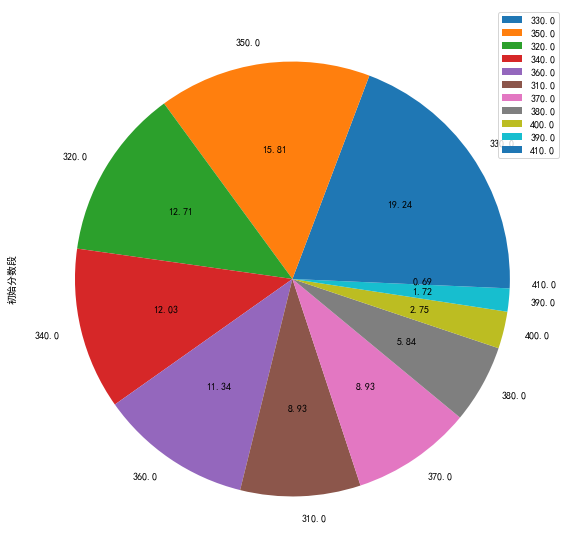

In [478]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False

# computer['总成绩分数段'].value_counts().plot(kind='bar',figsize=(8,8))
computer['初始分数段'].value_counts().plot.pie(subplots=True,figsize=(10, 10),autopct='%.2f')


plt.legend()
plt.show()

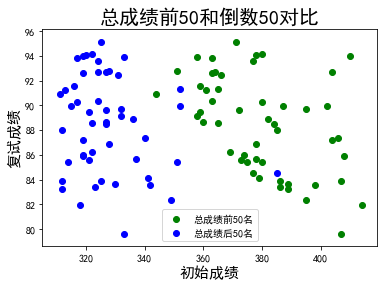

In [503]:
min_stu = computer.sort_values(['总成绩']).iloc[:50]
max_stu = computer.sort_values(['总成绩'],ascending=[False]).iloc[:50]

plt.scatter(max_stu['初始成绩'],max_stu['复试成绩'],color='green', label='总成绩前50名')
plt.scatter(min_stu['初始成绩'],max_stu['复试成绩'],color='blue', label='总成绩后50名')
plt.title("总成绩前50和倒数50对比",{'size':20})
plt.xlabel("初始成绩",{"size":15})
plt.ylabel("复试成绩",{"size":15})

plt.legend()
plt.show()